In [19]:
# Radiomics package
from radiomics import featureextractor

import six, numpy as np
import os
import SimpleITK as sitk
from radiomics import featureextractor
import SimpleITK as sitk
import progressbar
import glob
import imageio
from natsort import natsorted

In [20]:
import logging
import radiomics
# Regulate verbosity with radiomics.setVerbosity
# radiomics.setVerbosity(logging.INFO)  # Use logging.DEBUG for maximum output, default verbosity level = WARNING

# Get the PyRadiomics logger (default log-level = INFO)
logger = radiomics.logger
logger.setLevel(logging.DEBUG)  # set level to DEBUG to include debug log messages in log file

# Write out all log entries to a file
handler = logging.FileHandler(filename='testLog.txt', mode='w')
formatter = logging.Formatter('%(levelname)s:%(name)s: %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

In [21]:
# rootPath = 'C:\\Users\\chxu3973\\Desktop\\data\\myData_07_02_2018'
# outputPaths = glob.glob(rootPath + '/?_patch'+'/*' + '/[0-9]*'+'/[0-9]*'+'/[0-9]_output')
# # root/patch/class/patients/study/output
# studyPaths = [ os.path.dirname(p) for p in outputPaths] #exclude last name/xxx. 
# caseNums = [ os.path.basename(p)[0:1] for p in outputPaths]# get first char
import os
import glob

def getPatientPath(rootPath):
    #rootPath = '/media/chxu3973/My Passport/leukemia_test'
    #outputPaths = glob.glob(rootPath + '/[0-9]*'+'/mask*'+'/CT_mask*')
    studyPaths = glob.glob(rootPath + '/*')
    #studyPaths = [ os.path.dirname(p) for p in outputPaths] #exclude last name/xxx. 
    caseNums = [ os.path.basename(p) for p in studyPaths]# get last 4 char
    #studyPaths = [ os.path.dirname(p) for p in outputPaths] #get path
    return studyPaths, caseNums


In [22]:
def read_image(study_directory, case_num):
    ##
    import imageio
    from natsort import natsorted
    # study_directory='C:\\Users\\chxu3973\\Desktop\\leukemia\\leukemia\\leukemia_test\\0699'
    # case_num='0699'
    image_directory= os.path.join(study_directory,'PET')
    my_dt = 'int32'
    # Get the list of files belonging to a specific series ID.
    reader = sitk.ImageSeriesReader()
    # Use the functional interface to read the image series.
    image = sitk.ReadImage(reader.GetGDCMSeriesFileNames(image_directory))
    # Reverse the sequence to normal order
    old_mask_array = sitk.GetArrayFromImage(image)
    new_mask_array = np.zeros(old_mask_array.shape, dtype=my_dt)
    depth = old_mask_array.shape[0]# array rows
    for i in range(0,depth):
         new_mask_array[i,:,:] = old_mask_array[depth - i -1,:,:]
    #image = sitk.GetImageFromArray(new_mask_array)
    image = sitk.GetImageFromArray(old_mask_array)
    return image
def read_mask(study_directory, case_num):
    image_directory = os.path.join(study_directory,'PET')
    mask_directory = os.path.join(study_directory,'mask')
    images_name = natsorted(os.listdir(image_directory))
    #print(images_name)
    masks_name = natsorted(os.listdir(mask_directory))
    mask_np=[]
    for mask_name in masks_name:
        mask_np.append((imageio.imread(os.path.join(mask_directory,mask_name))))
    mask = sitk.GetImageFromArray(mask_np)
    return mask

# def read_mask(study_directory, case_num):
#     image_directory= os.path.join(study_directory,'CT')
#     mask_directory = os.path.join(study_directory,'CT_mask',case_num+'.tiff')
#     # images_name = natsorted(os.listdir(image_directory))
#     #print(images_name)
#     # masks_name = natsorted(os.listdir(mask_directory))
#     mask_np=read_tiff(mask_directory)
#     mask = sitk.GetImageFromArray(mask_np)
#     return mask

In [23]:
# def read_image(study_directory, case_num):
#     ##
#     import imageio
#     from natsort import natsorted
#     # study_directory='C:\\Users\\chxu3973\\Desktop\\leukemia\\leukemia\\leukemia_test\\0699'
#     # case_num='0699'
#     image_directory= os.path.join(study_directory,'CT')
#     my_dt = 'float64'
#     # Get the list of files belonging to a specific series ID.
#     reader = sitk.ImageSeriesReader()
#     # Use the functional interface to read the image series.
#     image = sitk.ReadImage(reader.GetGDCMSeriesFileNames(image_directory))
#     # Reverse the sequence to normal order
#     old_mask_array = sitk.GetArrayFromImage(image)
#     new_mask_array = np.zeros(old_mask_array.shape, dtype=my_dt)
#     depth = old_mask_array.shape[0]# array rows
#     for i in range(0,depth):
#          new_mask_array[i,:,:] = old_mask_array[depth - i -1,:,:]
#     #image = sitk.GetImageFromArray(new_mask_array)
#     image = sitk.GetImageFromArray(old_mask_array)
#     return image

# def read_mask(study_directory, case_num):
#     image_directory= os.path.join(study_directory,'CT')
#     mask_directory = os.path.join(study_directory,'CT_mask',case_num+'.tiff')
#     # images_name = natsorted(os.listdir(image_directory))
#     #print(images_name)
#     # masks_name = natsorted(os.listdir(mask_directory))
#     mask_np=read_tiff(mask_directory)
#     mask = sitk.GetImageFromArray(mask_np)
#     return mask
# # def read_mask(study_directory, case_num):
# #     image_directory = os.path.join(study_directory, 'CT00'+ case_num)
# #     mask_directory = os.path.join(study_directory,'mask', 'CT_mask')
# #     images_name = natsorted(os.listdir(image_directory))
# #     #print(images_name)
# #     masks_name = natsorted(os.listdir(mask_directory))
# # #     images_name = [s[60:] for s in images_name]
# #     images_name = [s[0:-4] for s in images_name ]
# #     masks_name = [s[0:-4] for s in masks_name ] 
# #     my_dt = 'int32'
# #     mask_np = np.zeros(sitk.GetArrayFromImage(image).shape, dtype=my_dt)
# #     for mask_name in masks_name:
# #         #try:
            
# #         mask_index = images_name.index(mask_name)
# #        # except:
# #             #print(images_name)
        
# #         mask_np[mask_index,:,:] = imageio.imread(os.path.join(mask_directory,mask_name+'.bmp'))
    
# #     mask_np[mask_np == 0] = 0 #background
# #     mask_np[mask_np == 1] = 1 #mask
# #     mask = sitk.GetImageFromArray(mask_np)
# #     return mask

# Main Fuction

In [25]:
rootPath = '/media/chxu3973/My Passport/breast cancer project/data&table/totoal_breast_data/10356750'
getPatientPath(rootPath)

([], [])

In [29]:
 import imageio
from natsort import natsorted
# study_directory='C:\\Users\\chxu3973\\Desktop\\leukemia\\leukemia\\leukemia_test\\0699'
# case_num='0699'
# study_directory='/media/chxu3973/My Passport/breast cancer project/data/totoal_breast_data/10782963'
study_directory='/media/chxu3973/My Passport/123/123'
image_directory= os.path.join(study_directory,'T1+C')
my_dt = 'int32'
# Get the list of files belonging to a specific series ID.
reader = sitk.ImageSeriesReader()
# Use the functional interface to read the image series.
image = sitk.ReadImage(reader.GetGDCMSeriesFileNames(image_directory))
# # Reverse the sequence to normal order
old_mask_array = sitk.GetArrayFromImage(image)
new_mask_array = np.zeros(old_mask_array.shape, dtype=my_dt)
depth = old_mask_array.shape[0]# array rows
for i in range(0,depth):
     new_mask_array[i,:,:] = old_mask_array[depth - i -1,:,:]
image = sitk.GetImageFromArray(old_mask_array)

In [27]:
 import imageio
from natsort import natsorted
# study_directory='C:\\Users\\chxu3973\\Desktop\\leukemia\\leukemia\\leukemia_test\\0699'
# case_num='0699'
study_directory='/media/chxu3973/My Passport/totoal_breast_data/10782963'
image_directory= os.path.join(study_directory,'CT')
my_dt = 'int32'
# Get the list of files belonging to a specific series ID.
reader = sitk.ImageSeriesReader()
# Use the functional interface to read the image series.
image1 = sitk.ReadImage(reader.GetGDCMSeriesFileNames(image_directory))
# # Reverse the sequence to normal order
old_mask_array = sitk.GetArrayFromImage(image)
new_mask_array = np.zeros(old_mask_array.shape, dtype=my_dt)
depth = old_mask_array.shape[0]# array rows
for i in range(0,depth):
     new_mask_array[i,:,:] = old_mask_array[depth - i -1,:,:]
image1 = sitk.GetImageFromArray(old_mask_array)

In [34]:
mask_directory = os.path.join(study_directory,'Output Image')
images_name = natsorted(os.listdir(image_directory))
reader = sitk.ImageFileReader()
reader.SetFileName(mask_directory)
mask = reader.Execute()
mask.GetDepth()
arr = sitk.GetArrayFromImage(mask)

In [31]:
mask_directory = os.path.join(study_directory,'mask')
images_name = natsorted(os.listdir(image_directory))
#print(images_name)
masks_name = natsorted(os.listdir(mask_directory))
mask_np=[]
for mask_name in masks_name:
    mask_np.append(imageio.imread(os.path.join(mask_directory,mask_name)))
mask = sitk.GetImageFromArray(mask_np)

FileNotFoundError: [Errno 2] No such file or directory: '/media/chxu3973/My Passport/123/123/mask'

# wavelet filter image

In [35]:
# Filter PET image
wave=radiomics.imageoperations. _swt3(image, wavelet='coif1', level=1, start_level=0)
wave

(<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fa18024f7e0> >,
 [{'HHH': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fa18024f660> >,
   'HHL': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fa18024f9c0> >,
   'HLH': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fa18024fc90> >,
   'HLL': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fa18024f810> >,
   'LHH': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fa18024f6f0> >,
   'LHL': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fa18024fc60> >,
   'LLH': <SimpleITK.SimpleIT

In [30]:
# Filter CT image
wave1=radiomics.imageoperations. _swt3(image1, wavelet='coif1', level=1, start_level=0)


In [38]:
#GET PET texture feature image
d=radiomics.glrlm.RadiomicsGLRLM(wave1[1][0]['HLH'],mask)._calculateCMatrix()
e=radiomics.glcm.RadiomicsGLCM(wave1[1][0]['LHH'],mask)._calculateCMatrix()


In [36]:
#GET PET texture feature image
b=radiomics.glrlm.RadiomicsGLRLM(wave[1][0]['HLH'],mask)._calculateCMatrix()
c=radiomics.glszm.RadiomicsGLSZM(wave[1][0]['HHH'],mask)._calculateCMatrix()

In [38]:
z1,x1,y1 = b.nonzero()
x2,y2=c.nonzero()
z3,x3,y3 = d.nonzero()
z4,x4,y4 = e.nonzero()

NameError: name 'x3' is not defined

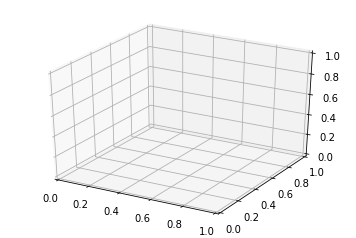

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#M = np.random.rand(10, 10, 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3, y3, z3,zdir='z', c= z3)
plt.savefig("10782963_HER2_bothwrong_CT_wavelet_HLH_glrlm.png")

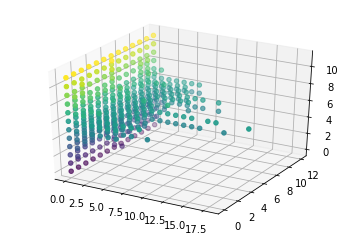

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#M = np.random.rand(10, 10, 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1,zdir='z', c= z1)
plt.savefig("10782963_HER2_bothwrong_CT_wavelet_LHH_glcm.png")

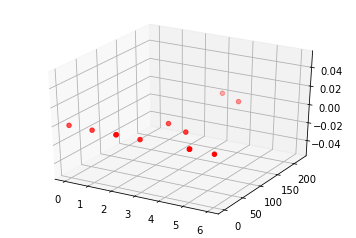

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#M = np.random.rand(10, 10, 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2, y2,zdir='z', c= 'red')
plt.savefig("10782963_HER2_bothwrong_PET_wavelet_HHH_glszm.png")

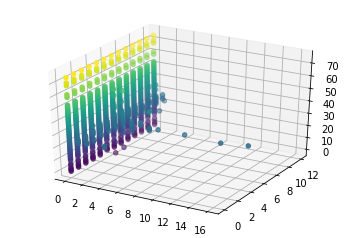

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#M = np.random.rand(10, 10, 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1,zdir='z', c= z1)
plt.savefig("10782963_HER2_bothwrong_PET_wavelet_HLH_glrlm.png")

In [197]:
radiomics.glcm.RadiomicsGLCM(wave[1][0]['HHH'],mask)._calculateCMatrix()

array([[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   2.69106566e-04,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   2.69106566e-04,
           0.00000000e+00,   3.194

In [70]:
a=radiomics.glcm.RadiomicsGLCM(image,mask)._calculateCMatrix()

In [116]:
# radiomics.glcm.RadiomicsGLCM(image,mask).getAutocorrelationFeatureValue()

185084.1436167463

In [92]:
b=radiomics.glrlm.RadiomicsGLRLM(image,mask)._calculateCMatrix()

In [98]:
c=radiomics.glszm.RadiomicsGLSZM(image,mask)._calculateCMatrix()

In [71]:
z,x,y = a.nonzero()

In [93]:
z1,x1,y1 = b.nonzero()

In [106]:
z1,x1,y1 = b.nonzero()
x2,y2=c.nonzero()

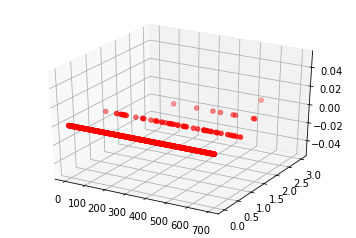

In [195]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#M = np.random.rand(10, 10, 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2, y2, zdir='z', c= 'red')

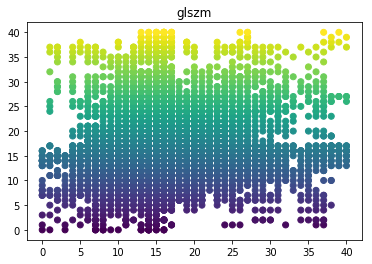

In [282]:
#导入必要的模块
import numpy as np
import matplotlib.pyplot as plt
#产生测试数据
fig = plt.figure()
ax1 = fig.add_subplot(111)
#设置标题
ax1.set_title('glszm')
#设置X轴标签
# plt.xlabel('X')
#设置Y轴标签
# plt.ylabel('Y')
#画散点图
ax1.scatter(x4,z4,c = z4,marker = 'o')
#设置图标
# plt.legend('x1')
# #显示所画的图


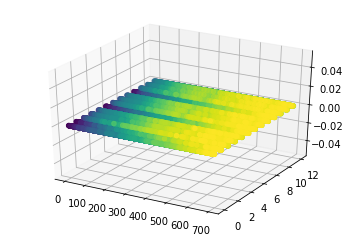

In [186]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#M = np.random.rand(10, 10, 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, zdir='z', c= z)
#plt.savefig("demo.png")

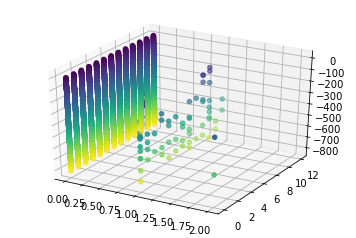

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#M = np.random.rand(10, 10, 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, -z1, zdir='z', c= z1)
#plt.savefig("demo.png")

TypeError: unhashable type: 'numpy.ndarray'

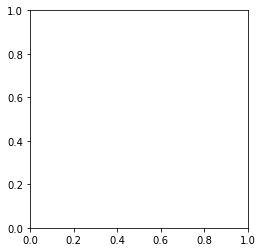

In [155]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(x,y, interpolation='nearest')
plt.show()

In [ ]:
plt.imshow(c.nonzero(), interpolation='nearest')
plt.show()

TypeError: bad operand type for unary -: 'range'

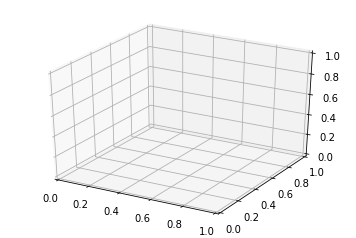

In [69]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#M = np.random.rand(10, 10, 10)

# cdict = {'red': ((0.0, 1.0, 1.0),   # Full red at the first stop
#                  (0.5, 0.0, 0.0),   # No red at second stop
#                  (1.0, 1.0, 1.0)),  # Full red at final stop
#         #
#         'green': ((0.0, 0.0, 0.0),  # No green at all stop
#                  (0.5, 0.0, 0.0),   # 
#                  (1.0, 0.0, 0.0)),  # 
#         #
#         'blue': ((0.0, 0.0, 0.0),   # No blue at first stop
#                  (0.5, 1.0, 1.0),   # Full blue at second stop
#                  (1.0, 0.0, 0.0))}  # No blue at final stop

xy = range(20)
z=xy
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= z,cmap='red')
#plt.savefig("demo.png")

In [37]:
image_directory = os.path.join(study_directory,'PET')
mask_directory = os.path.join(study_directory,'mask')
images_name = natsorted(os.listdir(image_directory))
#print(images_name)
masks_name = natsorted(os.listdir(mask_directory))
mask_np=[]
mask=[]
for mask_name in masks_name:
    mask_np.append(np.int32(imageio.imread(os.path.join(mask_directory,mask_name))))

mask = sitk.GetImageFromArray(mask_np)

In [9]:
np_mask=sitk.GetArrayFromImage(mask)

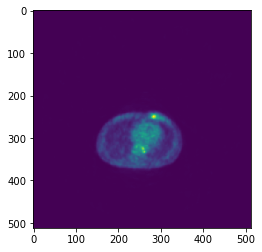

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
# plt.imshow(mask_np[166])
plt.imshow(old_mask_array[112])
#plt.imshow(mask[0])

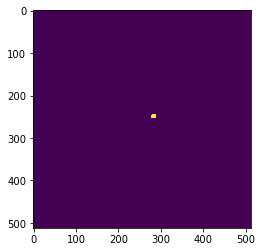

In [25]:
plt.imshow(mask_np[112])

In [41]:
mask_np[0].dtype

dtype('int32')

In [17]:
image

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7ff771231c00> >

In [18]:
mask

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7ff7712315d0> >

In [19]:
featureextractor.RadiomicsFeaturesExtractor(params)

In [18]:
params = os.path.join(os.getcwd(), '..','..', 'examples', 'exampleSettings', 'breast.yaml')
extractor = featureextractor.RadiomicsFeaturesExtractor(params)
# hang on to all our features
extractor.execute (image, mask)

OrderedDict([('general_info_BoundingBox', (187, 222, 108, 29, 20, 8)),
             ('general_info_EnabledImageTypes',
              {'LoG': {'sigma': [1.0, 3.0, 5.0]},
               'Original': {},
               'Wavelet': {}}),
             ('general_info_GeneralSettings',
              {'additionalInfo': True,
               'binWidth': 25,
               'distances': [1],
               'enableCExtensions': True,
               'force2D': False,
               'force2Ddimension': 0,
               'interpolator': 'sitkBSpline',
               'label': 1,
               'minimumROIDimensions': 1,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'padDistance': 10,
               'preCrop': False,
               'removeOutliers': None,
               'resampledPixelSpacing': None,
               'resegmentRange': None,
               'voxelArrayShift': 1000,
               'weightingNorm': None}),
          

In [20]:
# Alternative: use hardcoded settings (separate for settings, input image types and enabled features)
settings = {}
settings['binWidth'] = 25
settings['resampledPixelSpacing'] = None
# settings['resampledPixelSpacing'] = [3, 3, 3]  # This is an example for defining resampling (voxels with size 3x3x3mm)
settings['interpolator'] = 'sitkBSpline'
settings['verbose'] = True

extractor = featureextractor.RadiomicsFeaturesExtractor(**settings)

In [21]:
extractor.execute (image, mask)

OrderedDict()

In [28]:
params

'/home/chxu3973/Documents/pyradiomics/notebooks/pyRadiomics/../../examples/exampleSettings/breast.yaml'

In [13]:
feature_names = list(sorted(filter ( lambda k: not k.startswith("general_info_"), features)))

In [15]:
features

OrderedDict()

# Main Fuction

In [4]:
rootPath = '/media/chxu3973/My Passport/breast_test'

getPatientPath(rootPath)

(['/media/chxu3973/My Passport/breast_test/chenhaiyan1',
  '/media/chxu3973/My Passport/breast_test/chenhaiyan1',
  '/media/chxu3973/My Passport/breast_test/chenpeili1',
  '/media/chxu3973/My Passport/breast_test/chenpeili1',
  '/media/chxu3973/My Passport/breast_test/chenxiaoling1',
  '/media/chxu3973/My Passport/breast_test/chenxiaoling1'],
 ['CT', 'mask', 'CT', 'mask', 'CT', 'mask'])

In [82]:
#outputPaths = glob.glob(rootPath + '/[0-9]*'+'/mask*'+'/CT_mask*')
outputPaths = glob.glob(rootPath + '/*')


In [83]:
outputPaths

['/media/chxu3973/My Passport/breast_test/chenhaiyan1',
 '/media/chxu3973/My Passport/breast_test/chenpeili1',
 '/media/chxu3973/My Passport/breast_test/chenxiaoling1']

In [84]:
#studyPaths = [ os.path.dirname(p) for p in outputPaths] #exclude last name/xxx. 
caseNums = [ os.path.basename(p) for p in outputPaths]# get last 4 char
caseNums

['chenhaiyan1', 'chenpeili1', 'chenxiaoling1']

In [85]:
studyPaths = [ os.path.dirname(p) for p in outputPaths] #get path
studyPaths

['/media/chxu3973/My Passport/breast_test',
 '/media/chxu3973/My Passport/breast_test',
 '/media/chxu3973/My Passport/breast_test']

In [41]:
from PIL import Image
import numpy as np

def read_tiff(mask_directory, n_images):
    """
    path - Path to the multipage-tiff file
    n_images - Number of pages in the tiff file
    """
    img = Image.open(mask_directory)
    images = []
    for i in range(n_images):
        try:
            img.seek(i)
            slice_ = np.zeros((img.height, img.width))
            for j in range(slice_.shape[0]):
                for k in range(slice_.shape[1]):
                    slice_[j,k] = img.getpixel((j, k))

            images.append(slice_)

        except EOFError:
            # Not enough frames in img
            break

    return np.array(images)

In [50]:
img = Image.open(mask_directory)

In [58]:
img.seek(count)

In [44]:
mask=read_tiff(mask_directory, n_image)

In [45]:
mask

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

In [43]:
mask_directory='/media/chxu3973/My Passport/breast_test/chenxiaoling1/CT_mask/chenxiaoling1.tiff'

In [21]:
len(mask_directory)

62

In [26]:
n_image=79

In [64]:
mask=read_tiff(mask_directory)

In [65]:
mask

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

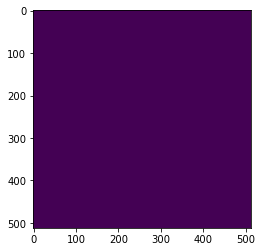

In [69]:
%matplotlib inline
from matplotlib import pyplot as plt
# plt.imshow(mask_np[166])
# #plt.imshow(old_mask_array[10])
plt.imshow(mask[0])

In [39]:
os.listdir('/media/chxu3973/My Passport/breast_test/chenxiaoling1/CT_mask')

['chenxiaoling1.tiff']

In [63]:
from PIL import Image
import numpy as np

def read_tiff(mask_directory):
    """
    path - Path to the multipage-tiff file
    n_images - Number of pages in the tiff file
    """
    img = Image.open(mask_directory)
    images = []
    count=0
    for i in range(500):
        try:
            img.seek(i)
            img.seek(count)
            slice_ = np.zeros((img.height, img.width))
            for j in range(slice_.shape[0]):
                for k in range(slice_.shape[1]):
                    slice_[j,k] = img.getpixel((j, k))

            images.append(slice_)

        except EOFError:
            break       
        count += 1          


    return np.array(images)

In [59]:
import os
from PIL import Image

count = 0
#tiffs_path = '/media/chxu3973/My Passport/breast_test/chenxiaoling1/CT_mask/chenxiaoling1.tiff'

for filename in os.listdir(tiffs_path):
    if filename.endswith(".tiff"):
        img = Image.open(filename)
        while True:
            try:   
                img.seek(count)
            except EOFError:
                break       
            count += 1          

# print count  

NotADirectoryError: [Errno 20] Not a directory: '/media/chxu3973/My Passport/breast_test/chenxiaoling1/CT_mask/chenxiaoling1.tiff'

In [40]:
Image.open('/media/chxu3973/My Passport/breast_test/chenxiaoling1/CT_mask/chenxiaoling1.tiff')

OSError: cannot write mode I;16 as PNG

<PIL.TiffImagePlugin.TiffImageFile image mode=I;16 size=512x512 at 0x7FAA563DB358>

In [71]:
os.path.join('/media/chxu3973/My Passport/breast_test/chenxiaoling1/CT_mask/')

'/media/chxu3973/My Passport/breast_test/chenxiaoling1/CT_mask/'